사용된 타겟 컬럼: 경제활동상태 (1차년도)

상위 10개 피처 (절댓값 기준) 및 계수:
[미취업] 구직실패 경험 여부                      -1.748543
[미취업] 구직활동 횟수 (회)                     -1.236774
[미취업] 최종면접 횟수 (회)                     -0.996746
[미취업] 향후 근로 의향                         0.925213
[미취업] 지난 1주간 일자리 제공시 근로 가능 여부 (구직자)    0.743942
[미취업] 최종학교 졸업 후 구직활동 여부                0.510982
취업시 스펙 영향력_기타                         -0.481346
[미취업] 지난 1개월간 구직활동 여부                  0.324840
[취준] 취업시 스펙 영향력_컴퓨터 자격증               -0.258107
[미취업] 구직실패 이유_필기시험 불합격                -0.253804


C:\Users\minjw\AppData\Local\Temp\ipykernel_35708\3813300411.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


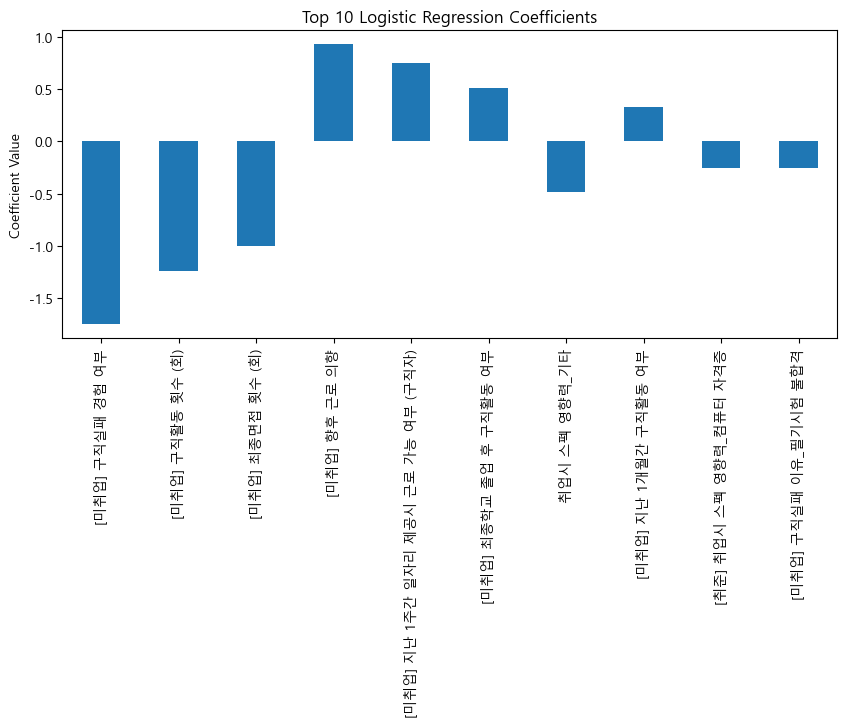

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


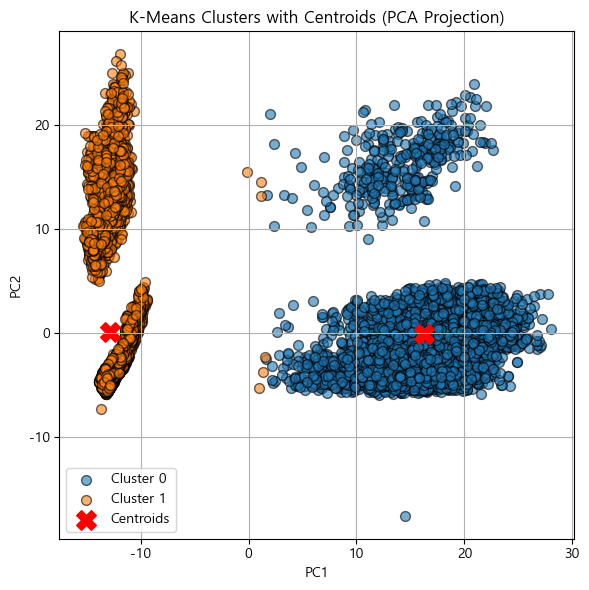


=== Cluster Centers (Feature Means by Cluster) ===
   응답자 성별  응답자 연령(세) : 1차 조사년도-출생년도  최종학력 (1차년도)  학생유형 (1차년도)  거주지역 (시도) (1차년도)  [동일] 현재 학교 재학 여부 (재/휴/학생아님)  [동일] 학교 소재지_시도  [동일] 학교 유형 (고/대/원)  [동일] 세부학교 유형_대  [공통] 전공계열  [대학교] 학교 생활만족도  [공통] 학자금 대출 경험 여부  [공통] 휴학 경험 여부  [공통] 휴학 횟수 (회)  [과거학교|고] 학교 소재지_시도  [과거고교] 학교생활만족도  [과거학교|고] 졸업 성적 평균_고  [과거학교|대] 고교 졸업후 대학 미진학 이유  [과거학교|대] 학교 소재지_시도  [과거학교|대] 세부학교 유형_대  [과거대학] 학교생활만족도  [과거학교|대] 전공계열  [과거학교|대] 미졸업 유형  [과거학교|대] 졸업 시점 (년)  [과거학교|대] 졸업 학점 평균 (대/원)  [과거학교|대] 입학 모집 시기  [과거학교|대] 학자금 대출 경험 여부  [과거학교|대] 휴학 경험 여부  [과거학교|원] 입학 경험 여부 (대/원)  [과거학교|원] 전공계열  [과거학교|원] 졸업 여부  [과거학교|원] 미졸업 유형  [과거학교|원] 졸업 시점 (년)  [과거학교|원] 졸업 학점 평균 (대/원)  [과거학교|재학중일] 재학 중 일자리 경험 여부  [과거학교|재학중일] 재학 중 일자리 횟수 (회)  [임] 구직활동 여부  [임] 최종면접 횟수 (회)  [임] 구직실패 경험 여부  [임] 구직실패 이유_학력  [임] 구직실패 이유_학교성적/학점  [임] 구직실패 이유_외국어능력  [임] 구직실패 이유_필기시험 불합격  [임] 구직실패 이유_자격증  [임] 구직실패 이유_전공  [임] 구직실패 이유_경력부족  [임] 구직실패 이유_성차별  [임] 구직실패 이유_외모  [임] 구직실패 이유_인맥/배경  [임] 고용형태 (정규직/비정규직)   직장만족도  

In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 한글 깨짐 현상 보완
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# 1) 데이터 로드 및 불필요 컬럼 제거
df = pd.read_excel('./khudata_cleaned_2.xlsx')   # 파일 경로를 필요에 따라 조정하세요
df = df.drop(columns=['패널 id', '가구 id'], errors='ignore')

# 2) 이진(0/1) 타겟 컬럼 자동 식별
binary_cols = [
    col for col in df.columns
    if set(df[col].dropna().unique()).issubset({0, 1}) and df[col].nunique() == 2
]
if not binary_cols:
    raise ValueError("0/1 이진 라벨 컬럼을 찾을 수 없습니다.")
target_col = binary_cols[0]
print(f"사용된 타겟 컬럼: {target_col}\n")

# 3) 피처·타겟 분리
X = df.drop(columns=[target_col])
y = df[target_col]

# 4) 로지스틱 회귀 모델 학습 및 계수 확인
lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)

coef_series = pd.Series(
    lr.coef_[0],
    index=X.columns
).sort_values(key=lambda x: np.abs(x), ascending=False)

print("상위 10개 피처 (절댓값 기준) 및 계수:")
print(coef_series.head(10).to_string())

# 5) 로지스틱 회귀 계수 시각화
plt.figure(figsize=(10, 4))
coef_series.head(10).plot(kind='bar')
plt.title('Top 10 Logistic Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# 6) K-Means 군집화 (k=2)
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X)

# 7) PCA로 2차원 투영
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# 8) 군집 시각화
plt.figure(figsize=(6, 6))
for i in [0, 1]:
    mask = (clusters == i)
    plt.scatter(
        components[mask, 0],
        components[mask, 1],
        label=f'Cluster {i}',
        alpha=0.6,
        edgecolor='k',
        s=50
    )

# 군집 중심점(projection) 표시
centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_2d[:, 0],
    centroids_2d[:, 1],
    marker='X',
    c='red',
    s=200,
    label='Centroids'
)

plt.title('K-Means Clusters with Centroids (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9) 클러스터 중심(피처 평균) 출력
centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=X.columns
)
print("\n=== Cluster Centers (Feature Means by Cluster) ===")
print(centers.to_string(float_format='%.4f'))
